# 技术指标

In [1]:
%matplotlib widget
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# 从yahoo finance获取数据
ticker = yf.Ticker("000001.SS")
# ticker = yf.Ticker("BTC-USD")

# 通过时间周期获取股价
# interval设置股价间隔，其值可以是1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# period的值可以是1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# hist = ticker.history(interval="1d", period="1y")
# 通过时间区间获取股价
hist = ticker.history(interval="1d", start="2023-12-01", end="2024-12-01")

# 从历史记录中提取开盘价、收盘价、最高价、最低价、成交量
df = hist[['Open', 'Close', 'High', 'Low', 'Volume']]

df.tail(10)

,Open,Close,High,Low,Volume
Date,,,,,
2024-11-18 00:00:00+08:00,3344.689941,3323.849121,3386.903076,3309.008057,744000
2024-11-19 00:00:00+08:00,3324.883057,3346.010010,3346.758057,3284.133057,625000
2024-11-20 00:00:00+08:00,3337.677979,3367.989014,3375.248047,3333.001953,566200
2024-11-21 00:00:00+08:00,3362.944092,3370.404053,3378.518066,3348.854980,530300
2024-11-22 00:00:00+08:00,3368.042969,3267.191895,3372.002930,3267.191895,630700
2024-11-25 00:00:00+08:00,3274.884033,3263.760010,3285.456055,3232.917969,538900
2024-11-26 00:00:00+08:00,3256.857910,3259.757080,3285.327881,3252.865967,472200
2024-11-27 00:00:00+08:00,3250.591064,3309.779053,3309.881104,3227.354980,511200
2024-11-28 00:00:00+08:00,3308.280029,3295.697998,3319.256104,3290.364014,512000


## 移动平均（moving average，MA）
***在统计学中是一种通过创建整个数据集中不同子集的一系列平均数来分析数据点的计算方法***

给定一个数列和一个固定子集大小，移动平均数的第一个元素是由数列的初始固定子集的平均值得到的。然后通过“向前移位”修改子集，即排除序列的第一个数，并在子集中包含下一个值。

移动平均通常与时间序列数据一起使用，以消除短期波动，突出长期趋势或周期。短期和长期之间的阈值取决于应用，移动平均的参数将相应地设置。数学上，移动平均是卷积的一种类型，因此它可以被看作是用于信号处理的低通滤波器的一个例子。当与非时间序列数据一起使用时，移动平均滤波器的频率分量更高，但与时间没有任何特定的联系，尽管通常暗含某种排序。简单地看，它可以看作是把数据变得更平滑。

移动平均线的变化包括：简单移动平均、指数移动平均、加权移动平均，以及累积移动平均。

### 简单移动平均（simple moving average，SMA）
---
在金融应用中，一个简单移动平均（SMA）是以前 n 个数据的未加权平均数。

例如，对于 n 天的收盘价样本，简单等权重移动平均是前 n 天收盘价的平均值。如果收盘价为$p_M$，$p_{M-1}$，... ，$p_{M-(n-1)}$，则公式为：

$$ \overline{p}_{SM} = \frac{p_M+p_{M-1}+...+p_{M-(n-1)}}{n} = \frac{1}{n}\sum_{i=0}^{n-1}p_{M-i} $$

当计算下一天的移动平均的时候，就会在求和中加入一个新值，剔除一个旧值，无需把所有数值重新加一遍：

$$ \overline{p}_{SM} = \overline{p}_{SM,prev} + \frac{1}{n}(p_M - p_{M-n}) $$

所选择的时间段取决于利率变动的类型，如短期、中期或长期。从金融角度来看，移动平均线水平可以解释为市场下跌时的支撑，或者市场上涨时的阻力。

### 指数移动平均（exponential moving average，EMA 或 EWMA）
---
指数移动平均是以指数式递减加权的移动平均。各数值的加权影响力随时间而指数式递减，越近期的数据加权影响力越重，但较旧的数据也给予一定的加权值。

加权的程度以常数 α 决定，α 数值介乎 0 至 1。α 也可用天数N来代表：${\displaystyle \alpha ={2 \over {N+1}}}$，所以，N=19天，代表 α=0.1。

设时间 t 的实际数值为 Yt，而时间t的EMA则为St；时间 t-1 的EMA则为 St-1，计算时间 t≥2 是方程式为：

$${S_{t}=\alpha \times Y_{t}+(1-\alpha )\times S_{t-1}}$$


设今日（t）价格为${\displaystyle p_{t}}$，则今日（t）的${\displaystyle EMA_{t}}$方程式为：

$${EMA_{t}=\alpha \times p_{t}+(1-\alpha )\times EMA_{t-1}=EMA_{t-1}+\alpha \times (p_{t}-EMA_{t-1})}$$

将${\displaystyle EMA_{t-1}}$递回代入：

$${EMA_{t}=\alpha \times (p_{t}+(1-\alpha )p_{t-1}+(1-\alpha )^{2}p_{t-2}+(1-\alpha )^{3}p_{t-3}+\cdots )}$$

理论上这是一个无穷级数，由于${\displaystyle (1-\alpha )}$小于 1，后面的数值会越来越小，可以被忽略只计算前 (N+1) 项。

对于近似均匀无变的数据少算的部分约为${\displaystyle (1-\alpha )^{N+1}}$

$${\text{EMA权重}}\;=\alpha \times {\Big [}1+(1-\alpha )+(1-\alpha )^{2}+(1-\alpha )^{3}+\cdots +(1-\alpha )^{N}{\Big ]}={\Big [}1-(1-\alpha )^{N+1}{\Big ]}$$

假设MA和EMA有相同质心，MA质心=${\displaystyle {(1+N) \over 2}}$，
EMA质心=${\displaystyle \alpha \times {\Big [}1+2(1-\alpha )+3(1-\alpha )^{2}+\cdots {\Big ]}={1 \over \alpha }}$，
即${\displaystyle {{(1+N)} \over 2}={1 \over \alpha }}$，
${\displaystyle \alpha ={2 \over {(N+1)}}}$

### 加权移动平均（weighted moving average，WMA）
---
指计算平均值时将个别数据乘以不同数值，在技术分析中，n日WMA的最近期一个数值乘以n、次近的乘以n-1，如此类推，一直到0：

$${WMA_{M}={np_{M}+(n-1)p_{M-1}+\cdots +2p_{M-n+2}+p_{M-n+1} \over n+(n-1)+\cdots +2+1}}$$

由于${WMA_{M+1}}$ 与 ${WMA_{M}}$的分子相差 ${np_{M+1}-p_{M}-\cdots -p_{M-n+1}}$，假设 ${p_{M}+p_{M-1}+\cdots +p_{M-n+1}}$ 为${总和_M}$:

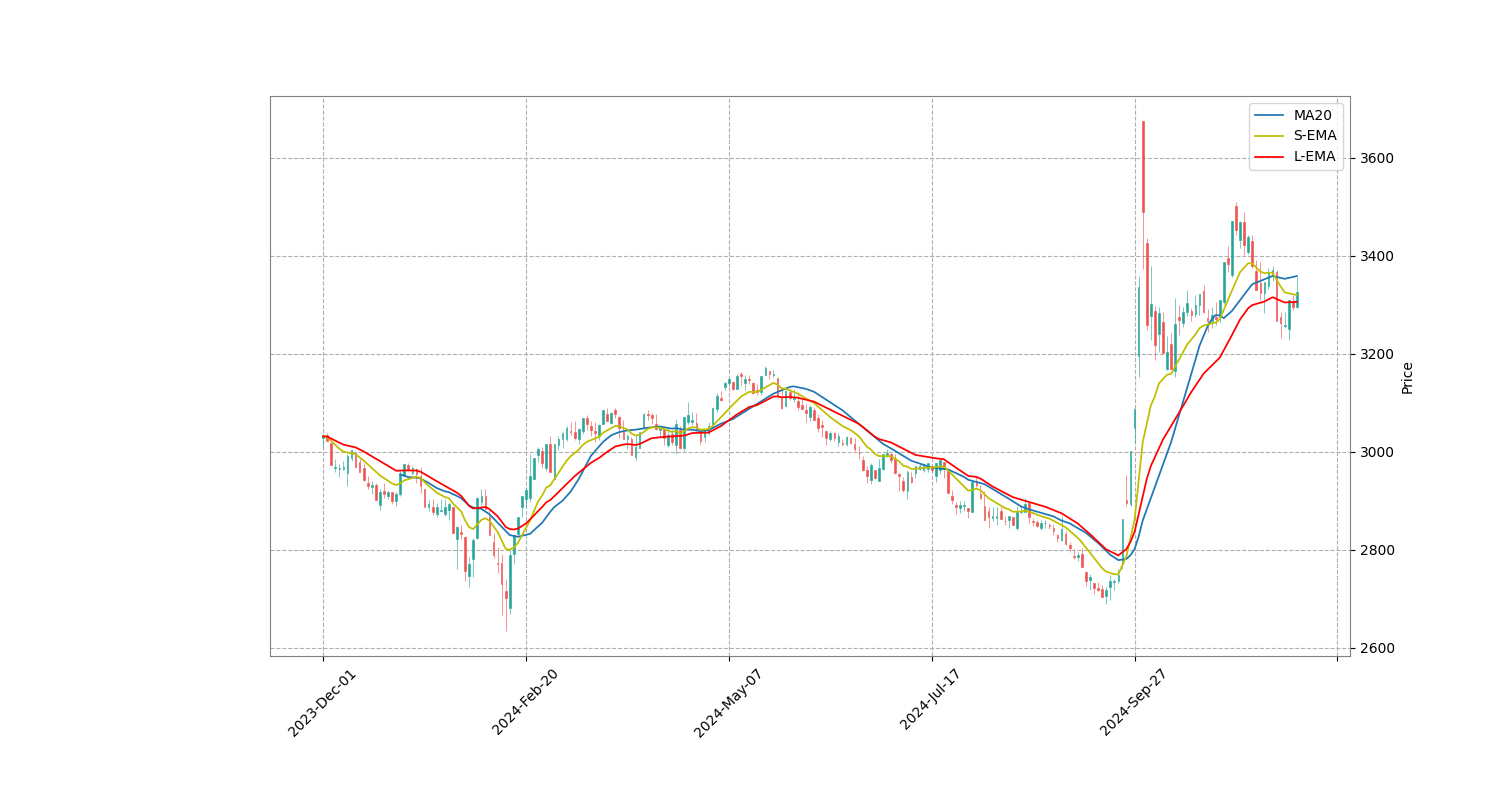

In [2]:
# 20天均线，window调整天数周期
ma20 = df['Close'].rolling(window=20).mean()
# 12天短期加权均线，span调整天数周期
ema12=df['Close'].ewm(span=12,adjust=False).mean()
# 26天短期加权均线，span调整天数周期
ema26=df['Close'].ewm(span=26,adjust=False).mean()
apdict = [
    mpf.make_addplot(ma20, type='line', label='MA20'),
    mpf.make_addplot(ema12, type='line', color='y', label='S-EMA'),
    mpf.make_addplot(ema26, type='line', color='r', label='L-EMA')
]

mpf.plot(df, addplot=apdict,
            style='tradingview',
            type='candle',
            figsize=(15, 8)
            )


## 乖离率（Bias Ratio，BIAS）
***代表当日股票收盘价或盘中市价与移动平均线（MA）的差距，以分析股价偏离某时期平均价（平均成本）的程度。***

乖离率可视作某时期的平均报酬率。乖离率是由葛兰碧移动均线八大法则（J.Granville Rules）所延伸的技术指标，其判断依据为股价偏离移动平均线很远时，会转而趋向移动平均线；但葛兰碧法则并未论述偏移程度应达到多少，股价才会向移动平均线靠近。

乖离率可分为正乖离率与负乖离率，若股价在移动平均线之上，称为正乖离率；股价在移动平均线之下，则为负乖离率。

当股价与移动平均线的差距越远时，乖离率的绝对值越大（乖离率可正可负），代表乖离越大，股价即将有修正偏离的可能；当乖离率呈现正值过大或负值过大的情况时，股价均会产生反转的修正走势。

**正乖离**越正表示**超买**（Overbought），将有下跌的压力；**负乖离**越负表示**超卖**（Oversold），将有上升的动能，此时股价将有向平均成本移动调整的机会。


### 乖离率
---
$$ nBIAS = \frac{Close-MA_n}{MA_n} \times 100\% $$

【注】
1. $nBIAS$为n日乖离线；
2. $Close$为当日收盘价；
3. MA为移动平均价、$MA_n$为n日移动平均线，n依需求自定日数，一般设定为3日和6日。

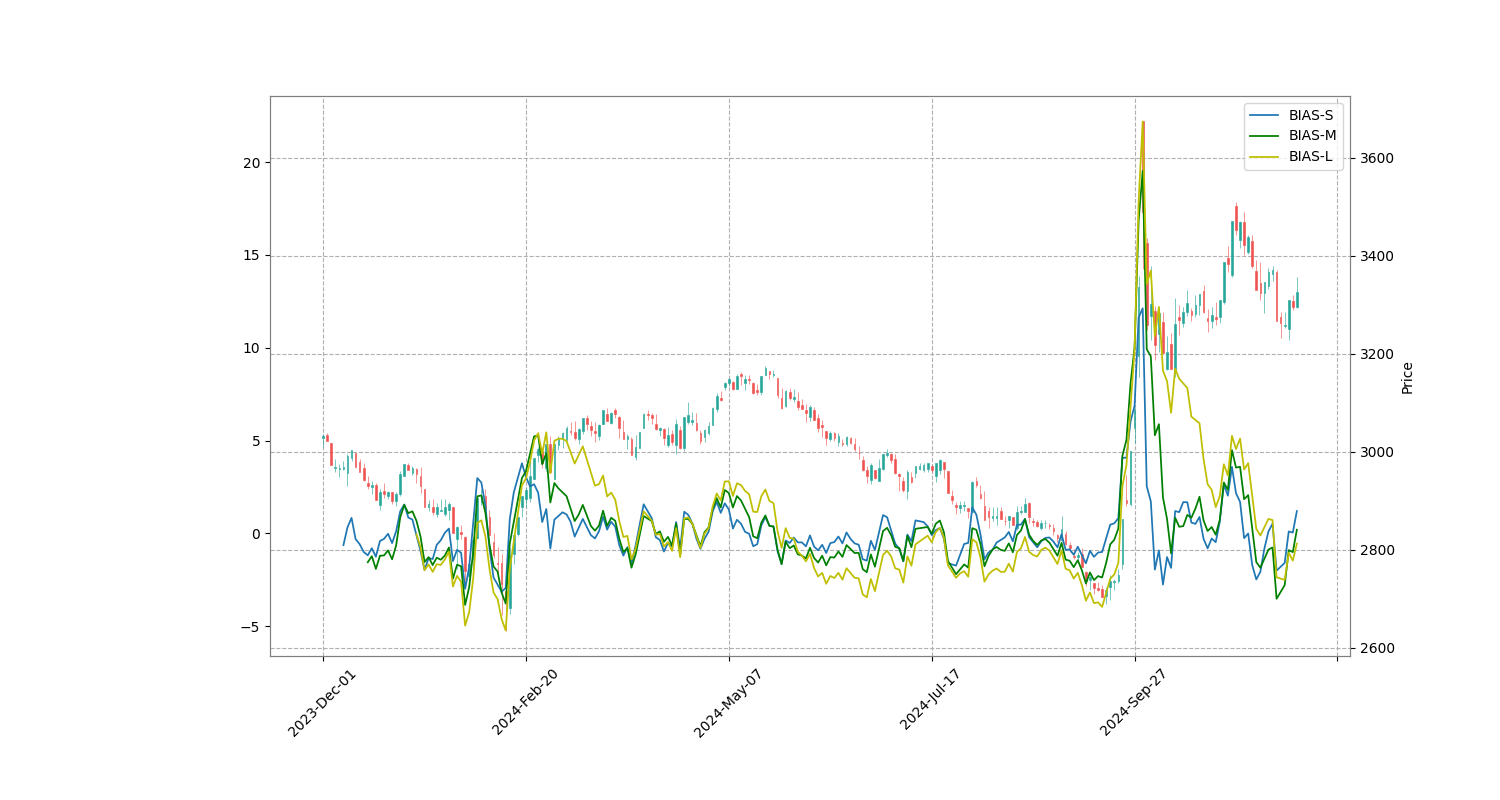

In [3]:
# 计算乖离率（BIAS）
def calculate_bias(data, window):
    return (data['Close'] / data['Close'].rolling(window=window).mean() - 1) * 100

# 短天期乖离率
bias_short = calculate_bias(df, 6)
# 中天期乖离率
bias_middle = calculate_bias(df, 12)
# 长天期乖离率
bias_long = calculate_bias(df, 24)

apdict = [
    # mpf.make_addplot(bias6, type='line', label='BIAS3'),
    mpf.make_addplot(bias_short, type='line', label='BIAS-S'),
    mpf.make_addplot(bias_middle, type='line', color='g', label='BIAS-M'),
    mpf.make_addplot(bias_long, type='line', color='y', label='BIAS-L'),
]

mpf.plot(df, addplot=apdict,
            style='tradingview',
            type='candle',
            figsize=(15, 8),
            )

### 均线乖离率
---
均线乖离率的概念是根据长短天期移动平均线的差值来决定多空的方向。如果股价在长天期均线之上则作多；反之股价在长天期均线之下则作空或空手。

$$ BIAS_{(MA)} = \frac{MA_{short} - MA_{long}}{MA_{long}} \times 100\% $$

【注】
1. $BIAS_{(MA)}$：均线乖离率；
2. $MA_{short}$为短天期均线、$MA_{long}$为长天期均线。


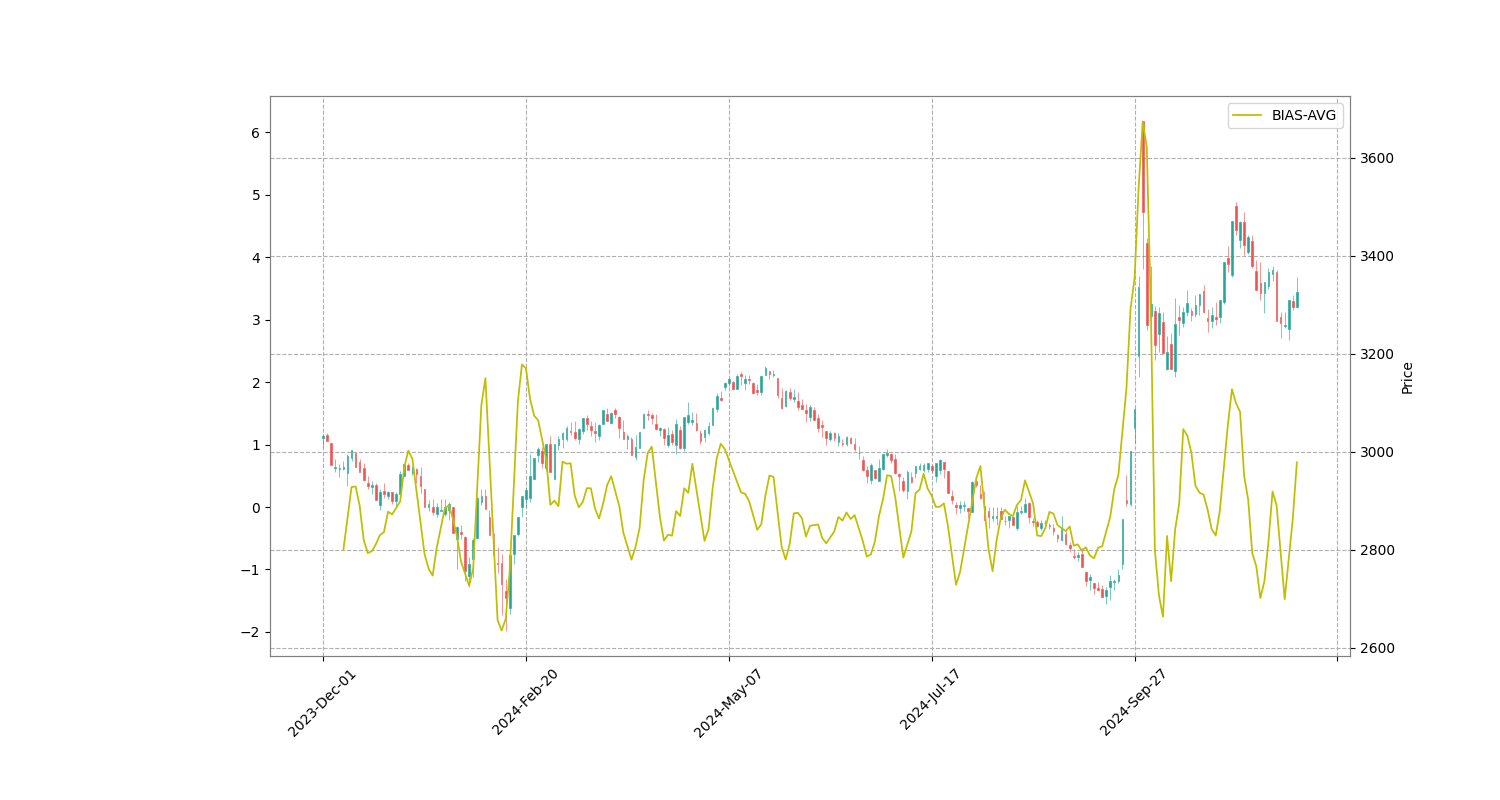

In [4]:
# 计算均线乖离率（Moving average Bias Ratio）
def calculate_avg_bias(data, short, long):
    # 计算短期平均线
    ma_short = data['Close'].rolling(window=short).mean()
    # 计算长期平均线
    ma_long = data['Close'].rolling(window=long).mean()
    # 计算均线乖离率
    return (ma_short / ma_long - 1) * 100

bias_avg = calculate_avg_bias(df, 3, 6)

apdict = [
    mpf.make_addplot(bias_avg, type='line', color='y', label='BIAS-AVG')
]

mpf.plot(df, addplot=apdict,
            style='tradingview',
            type='candle',
            figsize=(15, 8),
            )

### n-mBIAS
---
$$ n-mBIAS = nBIAS - mBIAS $$

短天期的乖离率减去长天期的乖离率来分析趋势，一般会采用的天数为3天和6天。

当3BIAS与6BIAS交叉时，3-6BIAS会趋近于0，此点即为**支撑点**或**压力点**，此时可以视为买卖信号。不过3-6AIBS会有信号过多的问题，实际操作上可以拉长平均天数来使用（例如：10天和25天）。

## 布林带（Bollinger Bands，BBands）
布林带也称为布林通道、保力加通道、包宁杰带状，或布历加通道，是由美国作家、金融分析师约翰·包宁杰（John Bollinger）在1980年代发明的技术分析工具，通过该工具，投资者可以看到金融工具或商品的价格如何随著时间而波动。

该工具结合了移动平均和标准差的概念，其基本的型态是由三条轨道线组成的带状通道（中轨和上、下轨各一条）。“中轨”为股价的平均成本，“上轨”和“下轨”可分别视为股价的压力线和支撑线。

“布林带”是这样定义的：
- 中轨 = N时间段的简单移动平均线
- 上轨 = 中轨 + K × N时间段的标准差
- 下轨 = 中轨 − K × N时间段的标准差

一般情况下，设定N=20和K=2，这两个数值是一开始创办人所设计的标准用法，也是在布林带当中使用最多的。在日线图里，N=20其实就是“月均线”（MA20）。

依照正态分布规则，约有95%的数值会分布在距离平均值有正负2个标准差（${\displaystyle \pm 2\sigma }$）的范围内。

布林带是由三条线组成，在中间的通常为 20 天平均线，而在上下的两条线则分别为信道顶和信道底，算法是首先计出过去 20 日收巿价的标准差，通常再乘2得出2倍标准差，通道顶为 20 天平均线加 2 倍标准差，通道底则为 20 天平均线减 2 倍标准差。

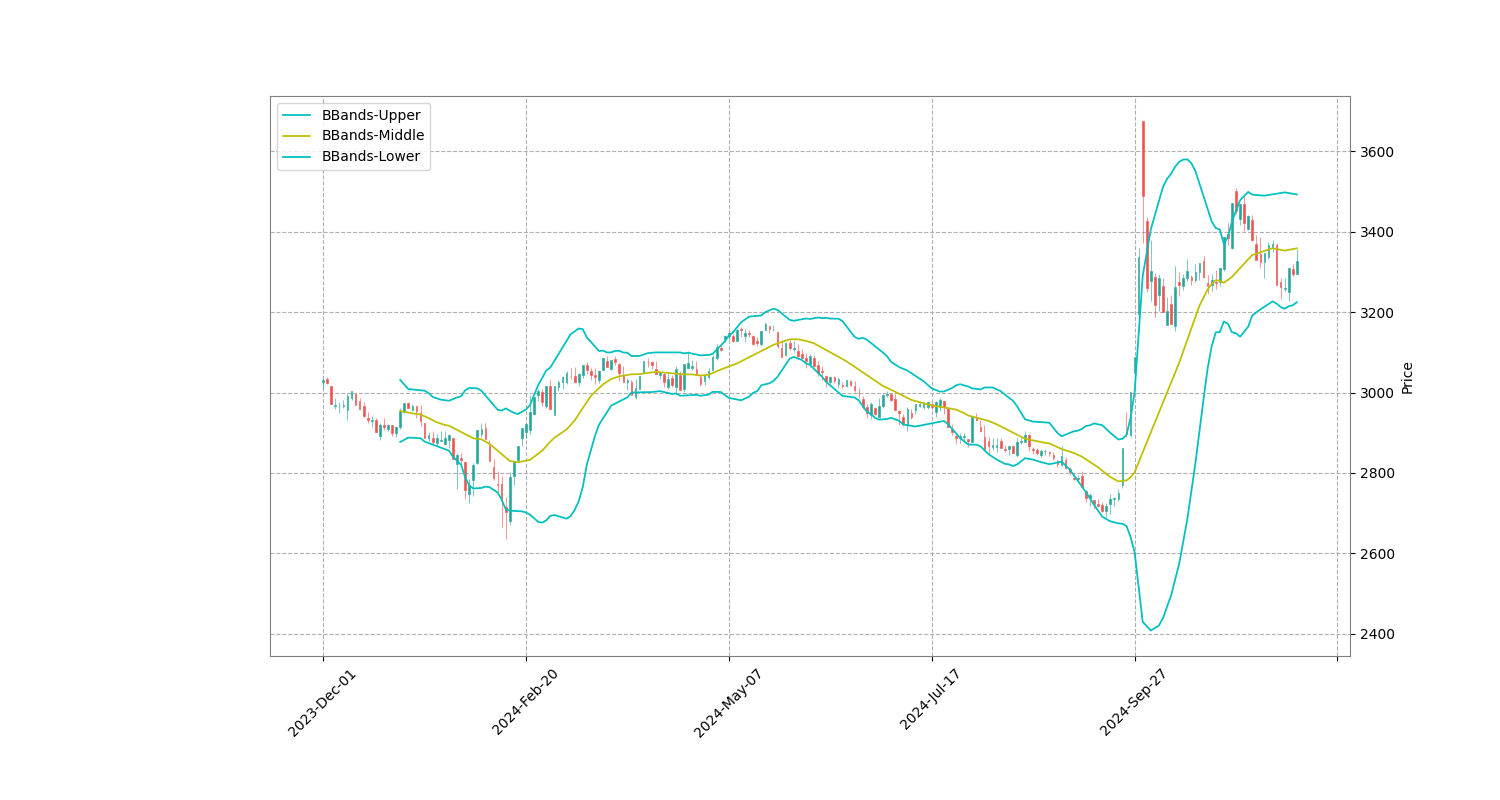

In [5]:
# 计算布林带（BBands）
def calculate_bbands(window):
    # 计算window天数的移动均线
    sma = df['Close'].rolling(window=window).mean()
    # 计算window天数的标准差
    std = df['Close'].rolling(window=window).std()
    # 计算布林带上轨和下轨
    upper_band = sma + 2 * std
    lower_band = sma - 2 * std
    
    data = pd.DataFrame({
        'MB': sma,
        'UB': upper_band,
        'LB': lower_band
    })    
    return data

# 计算20天平均线的布林带
bbands_df = calculate_bbands(20)

apdict = [
    mpf.make_addplot(bbands_df['UB'], type='line', color='c', label='BBands-Upper'),
    mpf.make_addplot(bbands_df['MB'], type='line', color='y', label='BBands-Middle'),
    mpf.make_addplot(bbands_df['LB'], type='line', color='c', label='BBands-Lower')
]

mpf.plot(df, addplot=apdict,
            style='tradingview',
            type='candle',
            figsize=(15, 8),
            )

## 成交量 (Trading volume)
成交量是指某一特定资产在一段时间內交易的数量，成交量是市场活动和流动性的关键指标，因此该项指标通常会与价格并列显示。

一份交易的达成，需要买方、卖方共同促成，故每一次成交都是单一的交易，成交量就是以此形成。

当整体市场交易活动趋于热络，那么成交量势必增加，而成交量增加也代表“市场动能”强劲，有买家愿意承接卖家的抛售力量，故常在短线上酝酿反弹机会。

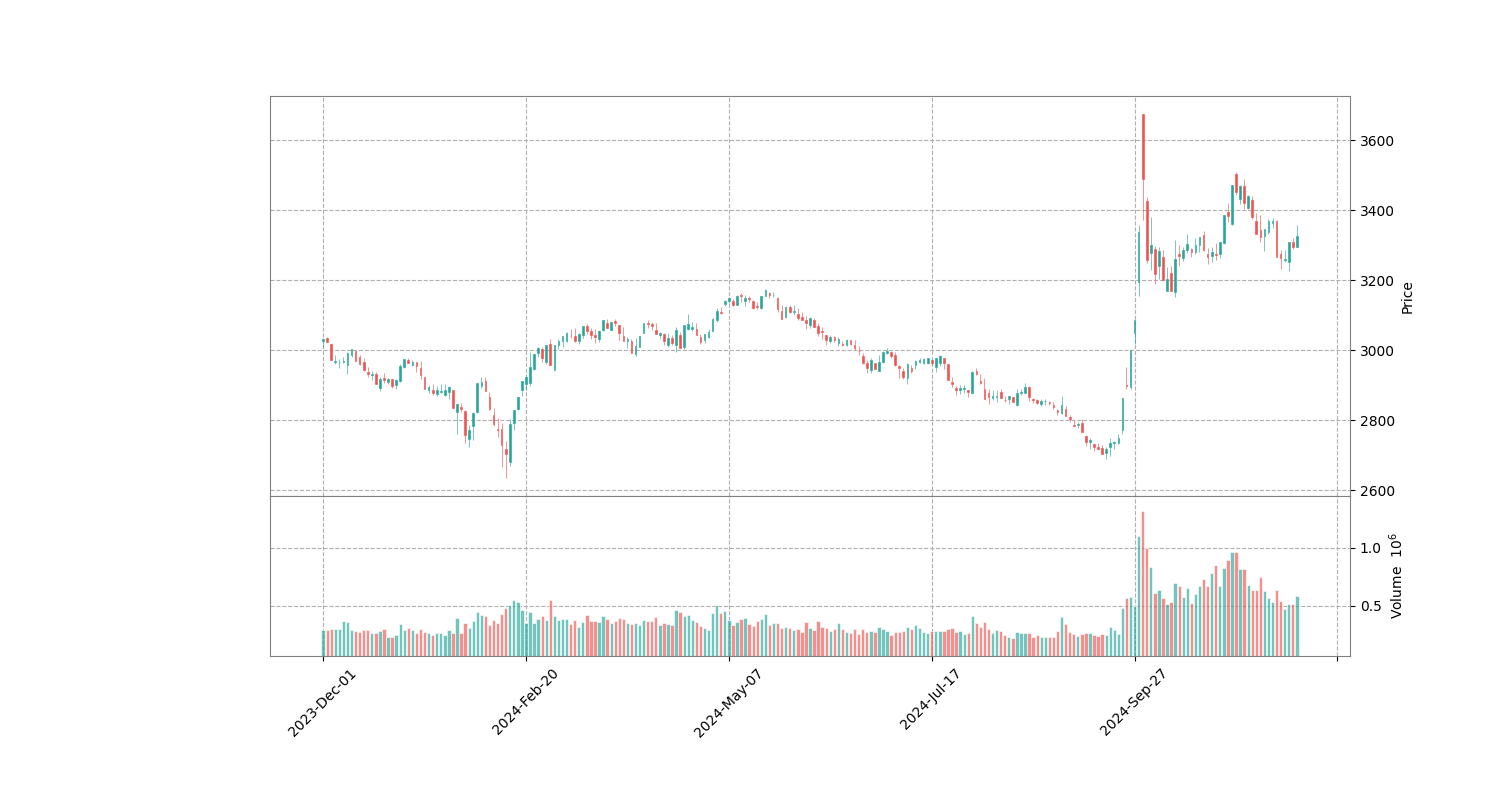

In [6]:
# 绘制成交量
mpf.plot(df, volume=True,
            volume_panel=1,
            style='tradingview',
            type='candle',
            figsize=(15, 8),
            )

## 相对强弱指数 (Relative Strength Index，RSI)

相对强弱指数是一个借由比较价格升降运动，以表达价格强度的技术分析工具；它是以动量为基础的振荡指标，用来测量价格动向的快慢(速度)和变化(幅度)。以RSI之高低来决定买卖时机是根据涨久必跌，跌久必涨之原则。以RSI作为买卖研判时，通常会设定区域界线。

根据威尔德的测量结果，当n=14时，指数最具代表性。他指出当某证券的RSI升至70时，代表该证券已被超买（Overbought），投资者应考虑出售该证券。相反，当证券RSI跌至30时，代表证券被超卖（Oversold），投资者应购入该证券。

当某证券的价格变动倾向（上升或下跌）越趋极端，价格变动逆转的可能性将越大。当RSI达80或20时，证券已被严重超买或超卖，投资者此时更应小心留意此类证券。然而，当该衍生工具市场处于利市状态（即牛市），严重超买或超卖的数值应被适当地向上调升，反之亦然。

在证券市场中，大幅波动对RSI有相当程度的影响，但这可能是错误的买卖讯号，投资者应配合其他技术分析指标以发挥相对强弱指数的功用。

***设每天向上变动为U，向下变动为D。***

> **在价格上升的日子：**  U ＝ 是日收市价 － 昨日收市价；D ＝ 0  

> **在价格下跌的日子：**  U ＝ 0；D ＝ 昨日收市价 － 是日收市价  

（任何情况下，U及D皆不可能为负数；若两天价格相同，则U及D皆等于零。）

***U及D的平均值皆需用上“指数移动平均法”（在n日内）。所谓“相对强度”，即U平均值及D平均值的比例：***
 
$$ {RS={\frac {EMA_{(U,n)}}{EMA_{(D,n)}}}} $$

$$ {RSI=\left(1-{\frac {1}{1+RS}}\right)\cdot 100\%} $$

【注】
1. RS：相对强度（Relative Strength）；
2. RSI: 相对强弱指数（Relative Strength Index）；
3. ${\displaystyle {\begin{smallmatrix}EMA_{(U,n)}\end{smallmatrix}}}$：U在n日内的指数平均值；
4. ${\displaystyle {\begin{smallmatrix}EMA_{(D,n)}\end{smallmatrix}}}$：D在n日内的指数平均值。

**相对强弱指数亦可直接由下式得出：**
$$ {RSI={\frac {EMA_{(U,n)}}{EMA_{(U,n)}+EMA_{(D,n)}}}\times 100\%} $$

***在指数移动平均理论中，U及D的平均值应由过去无限个数据计算而成。为了增加指数的可靠性，我们必须找寻足够旧数据，或直接从价格存在的首日起，开始计算出n日内“简单移动平均值”：***

$$ {AvgU_{initial}={\frac {U_{1}+U_{2}+\cdots +U_{n}}{n}}} $$

并在随后使用指数移动平均法：

$$ {AvgU_{today}=\alpha \times U_{today}+(1-\alpha )\times AvgU_{yesterday}} $$
【注】

1. $ {\displaystyle \alpha ={\frac {1}{n}}} $
2. 初始值 $ {\displaystyle AvgU_{yesterday}=AvgU_{initial}} $
3. D平均值的计算方法亦相若

### 卡特勒相对强弱指数
---
卡特勒相对强弱指数（Culter's RSI）摒弃了繁琐的指数移动平均法，改用简单移动平均法来计算出U及D的平均值，而两种方法所计算出的结果差别并不显著，因此为较多人所采用。

$$ {RS={\frac {SMA_{(U,n)}}{SMA_{(D,n)}}}\qquad RSI=\left(1-{\frac {1}{1+RS}}\right)\times 100\%} $$

或者

$$ {RSI={\frac {SMA_{(U,n)}}{SMA_{(U,n)}+SMA_{(D,n)}}}\times 100\%} $$

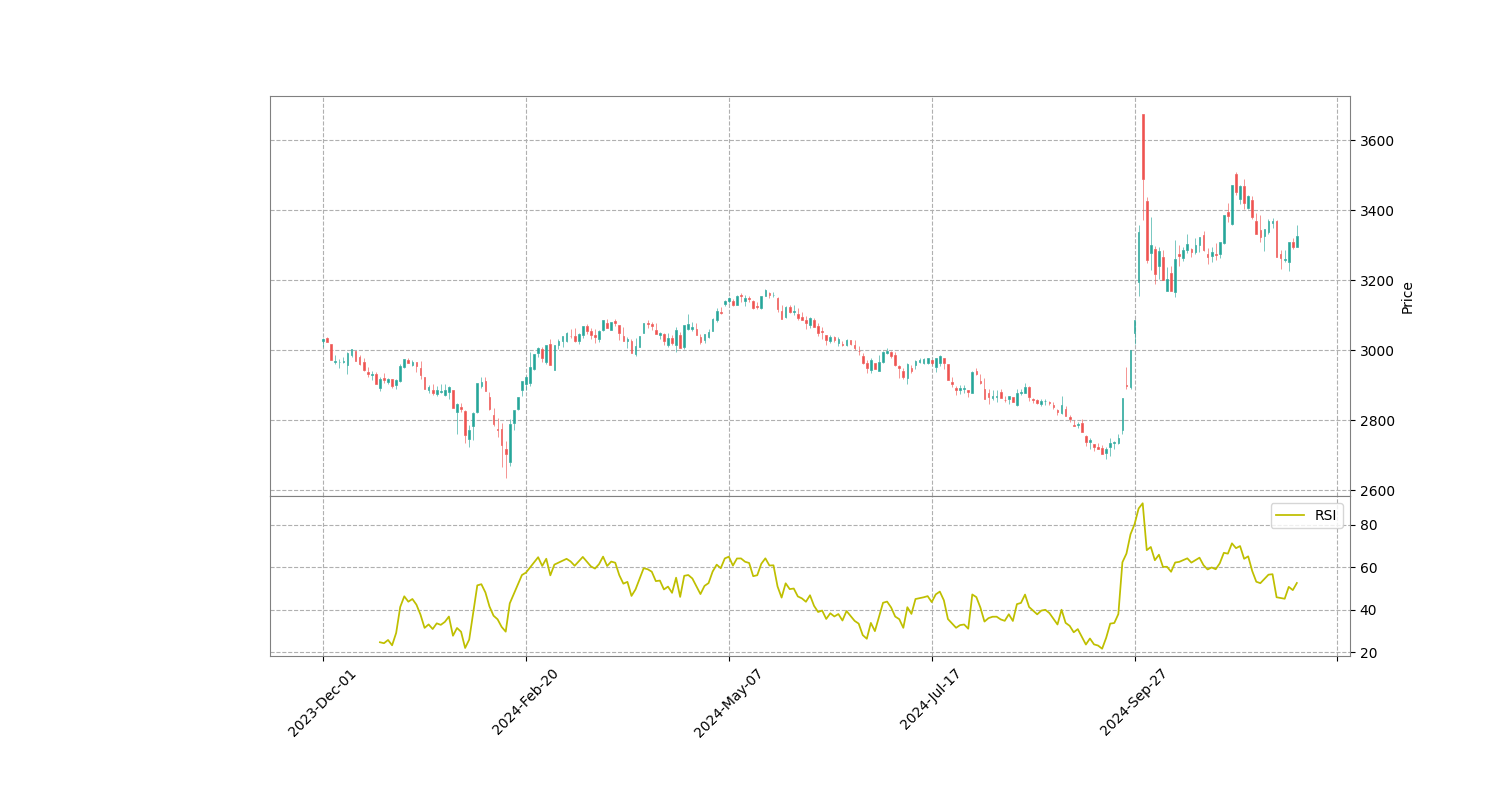

In [7]:
# 计算相对强弱指数（RSI）
# 引入talib库计算rsi
import talib as ta
# 计算rsi，时间周期为14天
rsi = ta.RSI(df['Close'], timeperiod=14)

apdict = [
    mpf.make_addplot(rsi, panel=1, type='line', color='y', label='RSI')
]

mpf.plot(df, addplot=apdict,
            style='tradingview',
            type='candle',
            figsize=(15, 8),
            )

# 指标合集

SMA + Volume + BBands + RSI + BIAS

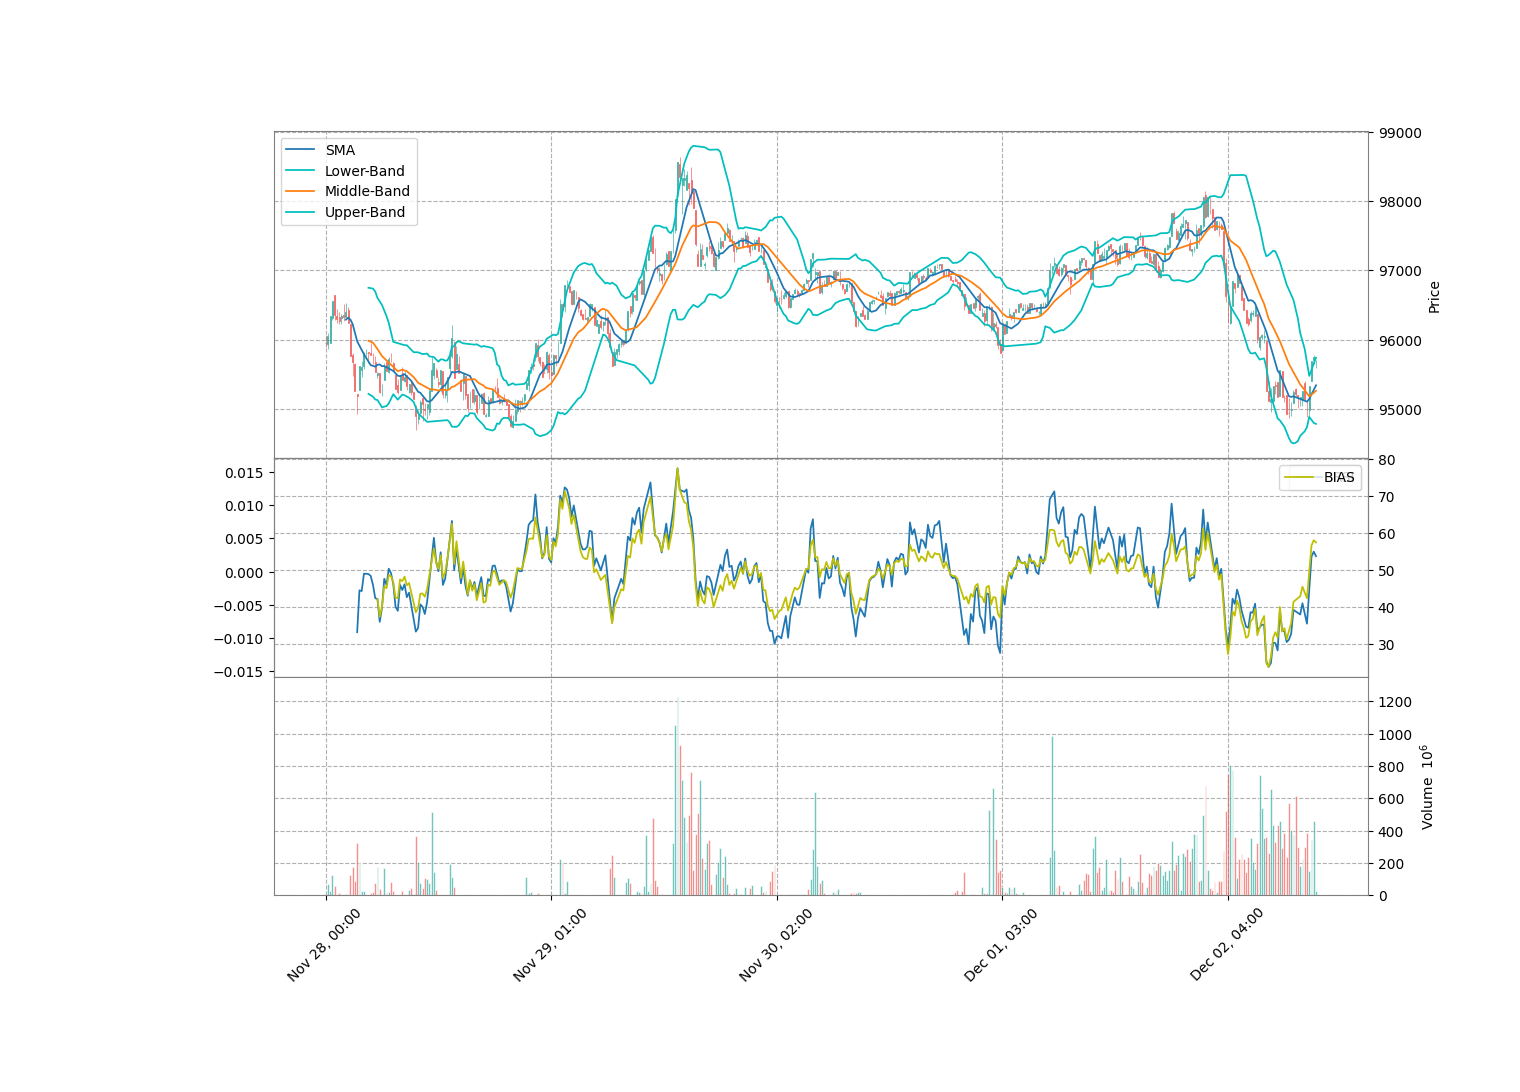

In [8]:
%matplotlib widget
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta

# 从yahoo finance获取数据
# ticker = yf.Ticker("000001.SS")
ticker = yf.Ticker("BTC-USD")

# 通过时间周期获取股价
# interval设置股价间隔，其值可以是1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# period的值可以是1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
hist = ticker.history(interval="15m", period="5d")
# 通过时间区间获取股价
# hist = ticker.history(interval="1d", start="2023-12-01", end="2024-12-01")

# 从历史记录中提取开盘价、收盘价、最高价、最低价、成交量
data = hist[['Open', 'Close', 'High', 'Low', 'Volume']]

# 均线
sma = ta.sma(data['Close'], length=10)
# 布林带
bbands = ta.bbands(data['Close'], length=20)
# 相对强弱指数
rsi = ta.rsi(data['Close'])
# 乖离率
bias = ta.bias(data['Close'], length=24)

apdict = [
    mpf.make_addplot(sma, type='line', label='SMA'),
    mpf.make_addplot(bbands['BBL_20_2.0'], type='line', color='c', label='Lower-Band'),
    mpf.make_addplot(bbands['BBM_20_2.0'], type='line', label='Middle-Band'),
    mpf.make_addplot(bbands['BBU_20_2.0'], type='line', color='c', label='Upper-Band'),
    mpf.make_addplot(rsi, type='line', panel=1, label='RSI'),
    mpf.make_addplot(bias, type='line', color='y', panel=1, label='BIAS')
]

mpf.plot(data, addplot=apdict,
            volume=True,
            volume_panel=2,
            panel_ratios=(3, 2),
            style='tradingview',
            type='candle',
            figscale=1.9,
            # figsize=(15, 10)
            )